In [ ]:
!pip install tensorflow


In [ ]:
import tensorflow as tf
print(tf.__version__)


2.15.0


# **Generate Synthetic Data**

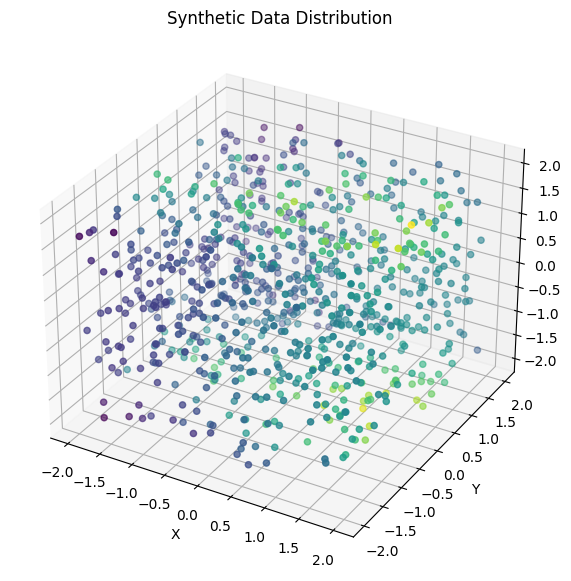

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Seed for reproducibility
np.random.seed(42)

# Generate synthetic data
def generate_data(num_samples=1000):
    # Randomly generate x, y, z in the range [-2, 2]
    x = np.random.uniform(-2, 2, num_samples)
    y = np.random.uniform(-2, 2, num_samples)
    z = np.random.uniform(-2, 2, num_samples)

    # Apply the non-linear equation
    f_xyz = np.sin(x) + np.cos(y) * np.power(z, 2)

    # Stack x, y, z as input features
    features = np.vstack((x, y, z)).T
    # The output is f_xyz
    outputs = f_xyz

    return features, outputs

# Generate synthetic data
features, outputs = generate_data()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, outputs, test_size=0.2, random_state=42)

# Quick visualization of the generated data in 3D space
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=y_train, cmap='viridis')
ax.set_title('Synthetic Data Distribution')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


In [ ]:
import tensorflow as tf

class ThreeLayerNN(tf.keras.Model):
    def __init__(self):
        super(ThreeLayerNN, self).__init__()
        self.dense1 = tf.keras.layers.Dense(64, activation='relu')  # First hidden layer with 64 neurons
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')  # Second hidden layer with 64 neurons
        self.dense3 = tf.keras.layers.Dense(1)  # Output layer with a single neuron

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        return self.dense3(x)


In [ ]:
model = ThreeLayerNN()


In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)


Epoch 1/100
20/20 [==============================] - 1s 14ms/step - loss: 1.4785 - mae: 0.9089 - val_loss: 1.0220 - val_mae: 0.7685
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.9085 - mae: 0.6937 - val_loss: 0.6911 - val_mae: 0.6152
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.7134 - mae: 0.6106 - val_loss: 0.5606 - val_mae: 0.5165
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5731 - mae: 0.5278 - val_loss: 0.4250 - val_mae: 0.4483
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4560 - mae: 0.4776 - val_loss: 0.3252 - val_mae: 0.3916
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.3697 - mae: 0.4375 - val_loss: 0.2759 - val_mae: 0.3781
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.3141 - mae: 0.4134 - val_loss: 0.2407 - val_mae: 0.3673
Epoch 8/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2780 - 

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")


7/7 [==============================] - 0s 2ms/step - loss: 0.0237 - mae: 0.1141
Test Loss: 0.023668067529797554, Test MAE: 0.11408098042011261


7/7 [==============================] - 0s 2ms/step


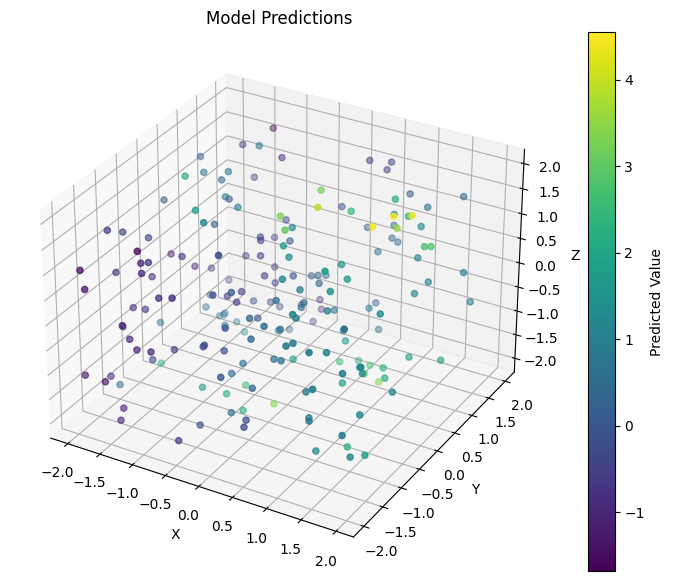

In [ ]:
plot_predictions(model, X_test, y_test)


# **Low-Level TensorFlow Implementation with Classes**

In [ ]:
# Adjusted class with smaller weight initialization
class ThreeLayerNetManual(tf.Module):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.input_size = 3
        self.hidden_size = 64
        self.output_size = 1

        # Initialize weights with a smaller standard deviation and biases
        self.W1 = tf.Variable(tf.random.normal([self.input_size, self.hidden_size], stddev=0.01), name='W1')
        self.b1 = tf.Variable(tf.zeros([self.hidden_size]), name='b1')
        self.W2 = tf.Variable(tf.random.normal([self.hidden_size, self.hidden_size], stddev=0.01), name='W2')
        self.b2 = tf.Variable(tf.zeros([self.hidden_size]), name='b2')
        self.W3 = tf.Variable(tf.random.normal([self.hidden_size, self.output_size], stddev=0.01), name='W3')
        self.b3 = tf.Variable(tf.zeros([self.output_size]), name='b3')

    def __call__(self, X):
        # Forward pass through the network
        Z1 = tf.add(tf.matmul(X, self.W1), self.b1)
        A1 = tf.nn.relu(Z1)
        Z2 = tf.add(tf.matmul(A1, self.W2), self.b2)
        A2 = tf.nn.relu(Z2)
        Z3 = tf.add(tf.matmul(A2, self.W3), self.b3)
        return Z3

# Now, let's recreate the model and train again with a smaller learning rate
manual_model = ThreeLayerNetManual()

# Reduce the learning rate
train_model(manual_model, X_train_tf, y_train_tf, epochs=100, learning_rate=0.001)


Epoch 0: Loss: 2.0386040210723877
Epoch 10: Loss: 2.0243465900421143
Epoch 20: Loss: 2.010647773742676
Epoch 30: Loss: 1.9974867105484009
Epoch 40: Loss: 1.9848430156707764
Epoch 50: Loss: 1.9726970195770264
Epoch 60: Loss: 1.9610286951065063
Epoch 70: Loss: 1.9498193264007568
Epoch 80: Loss: 1.9390504360198975
Epoch 90: Loss: 1.9287047386169434


In [ ]:
# Convert test data to TensorFlow tensors
X_test_tf = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test_tf = tf.convert_to_tensor(y_test, dtype=tf.float32)

# Perform a forward pass with the test data
y_pred_test = manual_model(X_test_tf)

# Calculate the test loss
test_loss = mse_loss(y_pred_test, y_test_tf)
print(f"Test Loss: {test_loss.numpy()}")


Test Loss: 1.8506070375442505


# **Functional API Implementation:**

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Define the input layer with shape matching the features of the data
inputs = Input(shape=(3,))

# Define the hidden layers and the output layer
x = Dense(64, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
outputs = Dense(1)(x)

# Create the model
functional_model = Model(inputs=inputs, outputs=outputs)

# Compile the model
functional_model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [ ]:
# Train the model
history = functional_model.fit(X_train, y_train, epochs=100, validation_split=0.2)


Epoch 1/100
20/20 [==============================] - 1s 11ms/step - loss: 1.2561 - mae: 0.8604 - val_loss: 0.7865 - val_mae: 0.6740
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.7322 - mae: 0.6104 - val_loss: 0.5253 - val_mae: 0.4896
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5182 - mae: 0.4993 - val_loss: 0.3832 - val_mae: 0.4152
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.3767 - mae: 0.4303 - val_loss: 0.2676 - val_mae: 0.3660
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.3014 - mae: 0.4019 - val_loss: 0.2209 - val_mae: 0.3500
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2541 - mae: 0.3793 - val_loss: 0.2012 - val_mae: 0.3399
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2251 - mae: 0.3562 - val_loss: 0.1826 - val_mae: 0.3266
Epoch 8/100
20/20 [==============================] - 0s 3ms/step - loss: 0.1994 - 

In [ ]:
# Evaluate the model on the test set
test_loss, test_mae = functional_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")


7/7 [==============================] - 0s 3ms/step - loss: 0.0279 - mae: 0.1263
Test Loss: 0.027916645631194115, Test MAE: 0.12626495957374573


7/7 [==============================] - 0s 3ms/step


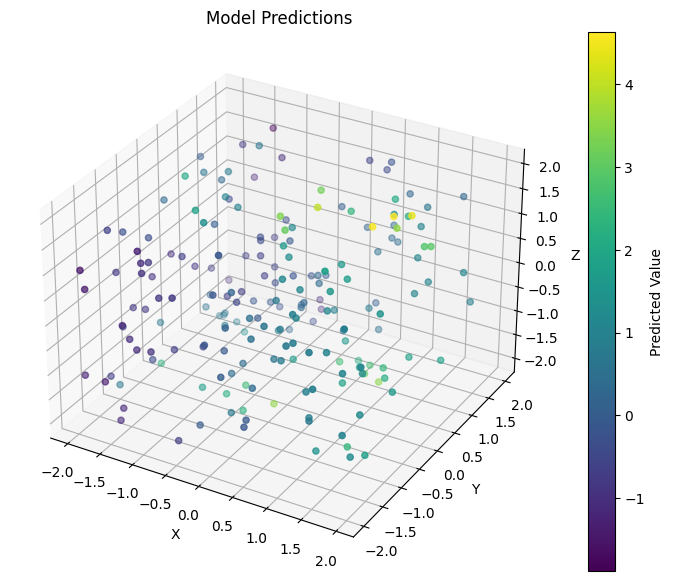

In [ ]:
plot_predictions(functional_model, X_test, y_test)
